# Take Your Barometer For A Walk!

![image, alt = "An image the Peak District in Autumn."](S2Wk2_Figures/Peaks.jpg)

The focus of this session is the analysis you must perform for the "Take Your Barometer For A Walk!" project.

## Analysis Session

You are free to use this session as you wish, but you will want to focus on the data analysis techniques required for your project work. You will want to employ some of the skills we developed last semester when learning to use Python for data analysis and presentation. For example:

- Are you going to perform the same calculation(s) multiple times? **Define a function.**


- Are you planning iterate through a task? **Use a loop.**


- Are there critera that should be taken into consideration when performing your analysis? **Use conditional statements.**


- Do you need to perfrom a calibration or extract information from linear data? **Perform a linear regression.**


- Do you need to present your data is a format suitible for scientific communication purposes? **Make a high quality plot.**


- Unsure how to get your code to do what you want it to or have an error? **Use Python Documentation, StackOverflow and W3Schools**.


---

The projects you are working on may differ between groups and for that reason it is not possible to prescribe a coding script for you to follow. That being said you may wish to break down your analysis into these familiar steps:

1. Import the Python libraries you will use to perform your analysis.

2. Use an appropriate package to import the data from your barometer app.

3. Plan your analysis.

4. Define functions for the code you will use mutliple times. 

5. Perform your calculations, regressions and error analysis. 

6. Make high quality figures to include in your presentation. 

Now use this time for your data analysis. Remember that you have access to all of the resources we used last semester and should you need any additional help, please just ask!


--- 
## Example Python Analysis

Hopefully you are fairly comfortable using Python to perform scientific analysis after the semester 1 labs and skills workshops, but if you still are not too sure, below is an example of a generic analysis.

Let's pretend that we have carried out a simple investigation to determine the spring constant of a spring. In the investigation, masses were added to the end of a spring and the extension of the spring was measured using a digital device with an uncertainty of $0.1\,$mm.

1. In this analysis the first thing I will want to do is import the libraries that will be used in the analysis and my data.

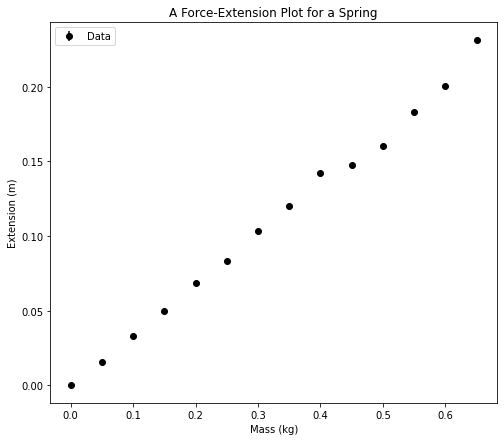

In [4]:
# Import the libraries that will be used in the analysis
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import linregress

# Import our data (in this instance from a comma seperated values (.csv) file)
Mass1, Extension1, ErrorExtension1 = np.genfromtxt("Force_Extension_Data.csv", 
                                                delimiter = ',', unpack = True, skip_header = 1)

# If we had a different file type (such as a tab seperated values (.tsv) file) 
# we can simply change the delimiter to "\t".

# I will also import the data to visualise it before I perform my analysis
plt.figure(figsize = (8,7))
plt.errorbar(Mass1, Extension1, yerr = ErrorExtension1, marker = 'o', linestyle = ' ', color = 'k', label = 'Data')
plt.legend()
plt.xlabel("Mass (kg)")
plt.ylabel("Extension (m)")
plt.title('A Force-Extension Plot for a Spring')
plt.show()

---
2. Once we have imported our data, we can perform any necessary calculations. Here I am going to define a function to convert between the mass I applied to my spring and the force this equates to. I do not actually need to define a function to do this as it is only a simple calculation and I am only performing it once, but this is a good reminder of how we would define one.

In [5]:
def MassToForce(Mass):
    force = Mass * 9.81
    return force

---
3. Now I will use my function and determine the spring constant of the spring using a linear regression. First, we must rearrange the equation:

$$ F = k \Delta x. $$ 

As we will be plotting our independent variable (force) on the x-axis and our dependant variable (extension) on the y axis:

$$ \Delta x = \frac{1}{k}F. $$

The spring constant, $k$, will simply be equal to the inverse of the gradient determined by the regression. 

In [6]:
# Use the function defined previously to convert between mass and force (F = mg)
Force1 = MassToForce(Mass1) 

# Perform our linear regression using scipy.stats
results = linregress(Force1, Extension1)

# Extract our the calculated gradient and intercept (and their uncertainties) from the regression results.
gradient = results.slope
errorGradient = results.stderr
intercept = results.intercept
errorIntercept = results.intercept_stderr

---
4. After we have extracted the desired parameters from the linear regression, the fit results can be reported appropriately. 

Note that the associated uncertainties are only reported to a single significant figure and that the precision of the values matches that of the uncertainties. These values are also reported with units. **This is how we should always present results with uncertainties.**

In [7]:
print("The gradient of the line of best fit is equal to:", "({:.4f}".format(gradient), 
      "+/-", "{:.4f})".format(errorGradient), 'N^-1 \n')

print("The intercept of the line of best fit is equal to:", "({:.3f}".format(intercept), 
      "+/-", "{:.3f})".format(errorIntercept), 'm \n')

print("The correlation coefficient and R2 value for this fit are:", 
      "{:.4f}".format(results.rvalue), "and", "{:.4f}".format(results.rvalue**2), "respectively. \n")

The gradient of the line of best fit is equal to: (0.0348 +/- 0.0007) N^-1 

The intercept of the line of best fit is equal to: (-0.001 +/- 0.003) m 

The correlation coefficient and R2 value for this fit are: 0.9977 and 0.9954 respectively. 



---
5. We may then use the gradient and its associated uncertainty to determine the spring constant and its associated uncertainty. The error propagation uses the following rule:

\begin{equation} 
Z = A^n,
\end{equation}

and

\begin{equation}
\Delta Z = n \frac{\Delta A}{A} \Delta Z. 
\end{equation}

Therefore the error on the spring constant, $k$, is determined from the gradient of the line of best fit, $m$, as follows:

\begin{equation}
k = \frac{1}{m} = m^{-1},
\end{equation}

meaning that $Z = k$, $A=m$ and $n=-1$. If we substitute these terms into our error equation above we get:

\begin{equation}
\Delta k = -1 \times \frac{\Delta m}{m} \times k.
\end{equation}

We take the magnitude of $\Delta k$ to be equal to the error as it can either be positive or negative (i.e plus or minus).


In [8]:
# Calculate and print the spring constant
springConstant = 1/gradient
errorSpringConstant = abs(-1 * (errorGradient/gradient) * springConstant)

print("The spring constant, k, is equal to:", "({:.1f}".format(springConstant), 
      "+/-", "{:.1f})".format(errorSpringConstant), 'Nm^-1 \n')

The spring constant, k, is equal to: (28.8 +/- 0.6) Nm^-1 



---
6. Now that I have performed my analysis, I can make a high quality plot to be used in my presentation/report/poster.

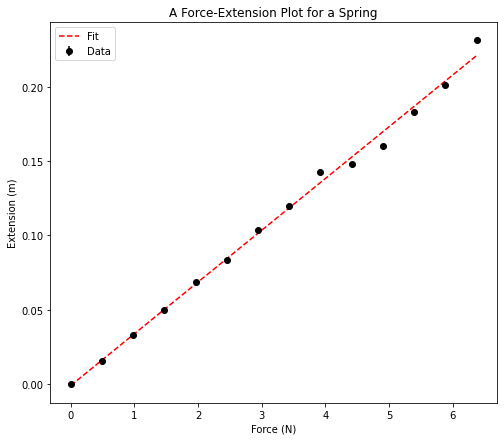

In [9]:
plt.figure(figsize = (8,7))
plt.errorbar(Force1, Extension1, yerr = ErrorExtension1, marker = 'o', linestyle = ' ', color = 'k', label = 'Data')
plt.plot(Force1, (gradient*Force1+intercept), marker = ' ', linestyle = '--', color = 'red', label = 'Fit')
plt.legend()
plt.xlabel("Force (N)")
plt.ylabel("Extension (m)")
plt.title('A Force-Extension Plot for a Spring')
plt.show()